In [18]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [19]:
df_train = pd.read_csv('../Dataset/Procesado/train_procesado.csv')
df_train = df_train.drop(columns=["ITE_ADD_CITY_NAME_encoded","ITE_ADD_STATE_NAME_encoded","ITE_ADD_NEIGHBORHOOD_NAME_encoded","ITE_TIPO_PROD_encoded","TIPOPROPIEDAD_encoded"])



In [20]:


X_encoded = pd.get_dummies(df_train, drop_first=True)  # `drop_first` evita multicolinealidad
X_encoded.to_csv('../Dataset/Procesado/train_onehot.csv', index=False)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente


Características más importantes en el primer componente:


,Feature,Importance
0,Gimnasio,0.261874
1,Pileta,0.260854
2,SalonDeUsosMul,0.242811
3,Seguridad,0.232970
4,AireAC,0.224608
5,Banos,0.209349
6,ITE_ADD_CITY_NAME_Capital Federal,0.201064
7,Jacuzzi,0.201033
8,ITE_ADD_STATE_NAME_Capital Federal,0.200876
9,Laundry,0.179480


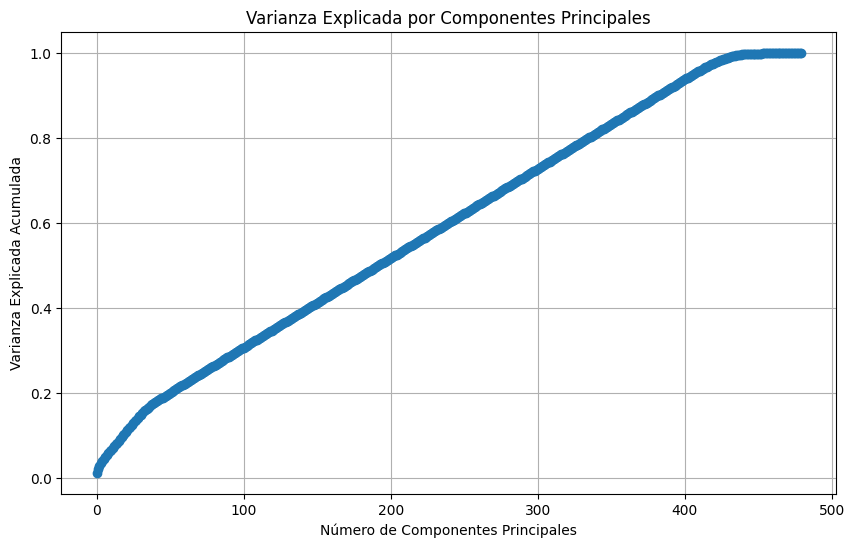

In [21]:
explained_variance_ratio = pca.explained_variance_ratio_

loadings = pca.components_  

feature_importance = pd.DataFrame(
    data=loadings.T, 
    columns=[f"PC{i+1}" for i in range(loadings.shape[0])],
    index=X_encoded.columns
)

# Mostrar las características más importantes en el primer componente
top_features = feature_importance["PC1"].sort_values(ascending=False).reset_index()
top_features.columns = ["Feature", "Importance"]

# Mostrar el DataFrame de las características más importantes
print("Características más importantes en el primer componente:")
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas si es necesario

display(top_features)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid()
plt.show()


In [27]:
correlation_matrix = X_encoded.corr()

price_correlation = correlation_matrix["precio_pesos_constantes"].sort_values(ascending=False)
price_correlation_df = price_correlation.reset_index()
price_correlation_df.columns = ["Variable", "Correlation"]

# Ajustar opciones de visualización para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

# Mostrar todas las correlaciones con el precio
print("Correlaciones de las variables (incluyendo One-Hot Encoding) con el precio:")
display(price_correlation_df)




Correlaciones de las variables (incluyendo One-Hot Encoding) con el precio:


,Variable,Correlation
0,precio_pesos_constantes,1.000000
1,ITE_ADD_NEIGHBORHOOD_NAME_Talar de Florida,0.194622
2,Banos,0.062986
3,ITE_ADD_NEIGHBORHOOD_NAME_Saint Matthew´s,0.058663
4,Ambientes,0.050785
5,ITE_ADD_NEIGHBORHOOD_NAME_Parque Centenario,0.050173
6,Dormitorios,0.040253
7,ITE_ADD_NEIGHBORHOOD_NAME_Belgrano Chico,0.036724
8,ITE_ADD_NEIGHBORHOOD_NAME_Villa Maipú,0.028214
9,Calefaccion,0.026591
